In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
%matplotlib inline 

In [2]:
df=pd.read_csv("C:/Users/Admin/Downloads/Dataset.csv")

In [3]:
missing_data=df.isnull()

In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Timestamp
False    2481
Name: Timestamp, dtype: int64

Lime_kiln_production_t/d
False    2481
Name: Lime_kiln_production_t/d, dtype: int64

Mud_flow_to_Filter_m3/h
False    2481
Name: Mud_flow_to_Filter_m3/h, dtype: int64

Density_mud_to_kiln_kg/m3
False    2481
Name: Density_mud_to_kiln_kg/m3, dtype: int64

Feed_zone_temperature_C
False    2481
Name: Feed_zone_temperature_C, dtype: int64

ESP_inlet_temperature_C
False    2481
Name: ESP_inlet_temperature_C, dtype: int64

Calcination_zone_temperature_C
False    2481
Name: Calcination_zone_temperature_C, dtype: int64

LMD_feed_mud_temperature _C
False    2481
Name: LMD_feed_mud_temperature _C, dtype: int64

LMD_kiln_feed_temperature_C
False    2481
Name: LMD_kiln_feed_temperature_C, dtype: int64

Esp_outlet_temperature_C
False    2481
Name: Esp_outlet_temperature_C, dtype: int64

Kiln_flame_temperature_C
False    2481
Name: Kiln_flame_temperature_C, dtype: int64

Bearing_fan_temperature_C
False    2481
Name: Bearing_fan_temperature_C, dt

In [5]:
df.head()

,Timestamp,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
0,24-08-16 00:00:00,798.667747,159.896639,1205.021608,502.068863,269.685021,746.318993,590.641734,415.707263,263.412758,...,44.113005,5042.171196,2396.877217,6.481069,-5029.683594,-2000,-4.927068,-34.905747,2883.768439,452.641449
1,24-08-16 00:30:00,798.449686,159.914889,1204.840400,501.889027,266.796239,737.006654,590.520355,415.753664,260.127347,...,43.924524,5025.550039,2306.910774,6.279912,-5029.683594,-2000,-4.939969,-35.112042,2868.067631,452.641449
2,24-08-16 01:00:00,798.231625,160.083309,1204.945270,502.103374,267.337429,718.110868,591.612307,414.413146,260.303590,...,43.736043,5008.928881,2450.513819,6.196669,-5029.683594,-2000,-4.952870,-35.883055,2923.644826,452.641449
3,24-08-16 01:30:00,798.013564,159.875902,1205.185474,502.358130,267.587721,724.973224,592.601287,413.454411,260.904727,...,43.547561,4993.424376,2611.431780,5.900719,-5029.683594,-2000,-4.965772,-34.664986,2908.512170,452.641449
4,24-08-16 02:00:00,797.795503,159.968484,1205.413424,502.612885,271.760741,737.208821,595.493488,411.233942,263.358234,...,43.359080,4989.879237,2559.687420,4.999143,-5029.683594,-2000,-4.974704,-33.810043,2903.507123,452.641449


In [6]:
df.tail()

,Timestamp,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
2476,14-10-16 21:30:00,805.179340,158.839048,1205.865704,518.194174,250.199807,800.164240,585.303597,412.658712,247.090915,...,53.839421,5037.826172,1899.216390,5.899122,-5052.992188,-2000,-5.033316,-38.486442,2768.294611,447.823273
2477,14-10-16 22:00:00,802.488867,158.792972,1205.623589,515.589438,249.908110,793.000562,584.585492,414.981009,246.396957,...,53.647787,5037.826172,1691.092324,6.028506,-5052.992188,-2000,-5.034819,-39.281534,2768.183025,447.823273
2478,14-10-16 22:30:00,799.798393,158.471010,1205.102027,514.448881,250.391824,767.159511,581.562052,409.265805,245.702999,...,53.456154,5037.826172,1786.470344,6.100906,-5052.992188,-2000,-5.036322,-38.877864,2757.873411,447.823273
2479,14-10-16 23:00:00,797.107920,158.044266,1205.179526,513.322408,249.169585,755.507199,581.913239,409.632506,245.009041,...,53.264521,5037.826172,1872.125848,6.002256,-5052.992188,-2000,-5.037825,-40.392731,2765.712822,447.823273
2480,14-10-16 23:30:00,794.417446,158.028168,1205.206954,512.482591,250.967253,749.775244,581.938663,411.721186,244.492747,...,53.072887,5037.826172,1773.982094,5.835135,-5052.992188,-2000,-5.039328,-39.534011,2776.931113,447.823273


In [7]:
df.describe()

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,Kiln_flame_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,...,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.0,2481.000000,2481.000000,2481.000000,2481.000000
mean,763.698384,153.042463,1203.919253,526.602223,261.258759,737.449953,610.153335,517.442464,254.807284,732.127956,...,52.228119,4843.320170,1923.536289,5.907778,-4989.178443,-2000.0,-4.930894,-35.526869,2765.949968,450.521325
std,85.071428,15.657971,13.745480,42.598556,19.982922,43.478139,34.197208,53.376273,17.518384,42.985806,...,4.564801,491.757432,539.138060,1.738618,421.202822,0.0,0.462863,3.591255,156.419350,5.111619
min,0.003006,0.292285,1000.936325,186.421780,215.937545,227.127009,258.748224,173.917882,213.709003,686.068507,...,33.970470,68.317656,-67.709786,2.993772,-5078.791016,-2000.0,-5.138164,-44.773266,284.218750,446.960799
25%,767.579789,154.416023,1204.650117,496.668270,248.390971,716.873717,586.292801,482.204186,243.207780,692.117129,...,49.506543,4775.271049,1620.438241,5.116294,-5069.626953,-2000.0,-5.075025,-37.777696,2724.065353,449.125671
50%,786.182044,157.011516,1205.123545,526.660946,257.081758,738.964244,608.751622,523.622775,251.119236,717.768969,...,52.132231,4930.009813,1926.279847,5.470593,-5044.923828,-2000.0,-5.039853,-35.712784,2761.961021,449.887454
75%,795.772667,159.617170,1205.569823,556.190620,270.784311,760.979694,633.151591,552.220261,264.177947,768.063296,...,54.814288,5061.548752,2274.441845,6.000594,-5032.273438,-2000.0,-4.972461,-33.563178,2806.105251,450.645172
max,812.766609,161.178032,1222.878858,622.865814,353.269039,852.573100,697.883685,675.710935,331.243128,849.022345,...,70.812299,5481.654257,3648.082098,20.102736,36.868881,-2000.0,-0.120815,-8.758041,3504.999859,585.969753


In [8]:
df.describe(include=['object'])

,Timestamp
count,2481
unique,2481
top,24-08-16 00:00:00
freq,1


In [9]:
df.drop(['Timestamp','ESP_Diff_Pressure_pa'],axis=1,inplace=True)

In [10]:
df

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,Kiln_flame_temperature_C,...,IDF_bearing_temperature_C,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
0,798.667747,159.896639,1205.021608,502.068863,269.685021,746.318993,590.641734,415.707263,263.412758,806.866767,...,48.849698,44.113005,5042.171196,2396.877217,6.481069,-5029.683594,-4.927068,-34.905747,2883.768439,452.641449
1,798.449686,159.914889,1204.840400,501.889027,266.796239,737.006654,590.520355,415.753664,260.127347,809.187064,...,49.538594,43.924524,5025.550039,2306.910774,6.279912,-5029.683594,-4.939969,-35.112042,2868.067631,452.641449
2,798.231625,160.083309,1204.945270,502.103374,267.337429,718.110868,591.612307,414.413146,260.303590,821.491469,...,50.227490,43.736043,5008.928881,2450.513819,6.196669,-5029.683594,-4.952870,-35.883055,2923.644826,452.641449
3,798.013564,159.875902,1205.185474,502.358130,267.587721,724.973224,592.601287,413.454411,260.904727,830.704369,...,50.916387,43.547561,4993.424376,2611.431780,5.900719,-5029.683594,-4.965772,-34.664986,2908.512170,452.641449
4,797.795503,159.968484,1205.413424,502.612885,271.760741,737.208821,595.493488,411.233942,263.358234,832.682633,...,51.605283,43.359080,4989.879237,2559.687420,4.999143,-5029.683594,-4.974704,-33.810043,2903.507123,452.641449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,518.194174,250.199807,800.164240,585.303597,412.658712,247.090915,703.005751,...,57.391629,53.839421,5037.826172,1899.216390,5.899122,-5052.992188,-5.033316,-38.486442,2768.294611,447.823273
2477,802.488867,158.792972,1205.623589,515.589438,249.908110,793.000562,584.585492,414.981009,246.396957,703.400545,...,57.592752,53.647787,5037.826172,1691.092324,6.028506,-5052.992188,-5.034819,-39.281534,2768.183025,447.823273
2478,799.798393,158.471010,1205.102027,514.448881,250.391824,767.159511,581.562052,409.265805,245.702999,696.143494,...,57.476724,53.456154,5037.826172,1786.470344,6.100906,-5052.992188,-5.036322,-38.877864,2757.873411,447.823273
2479,797.107920,158.044266,1205.179526,513.322408,249.169585,755.507199,581.913239,409.632506,245.009041,688.315620,...,57.284473,53.264521,5037.826172,1872.125848,6.002256,-5052.992188,-5.037825,-40.392731,2765.712822,447.823273


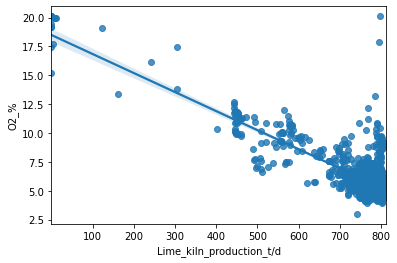

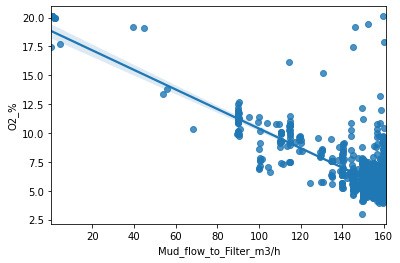

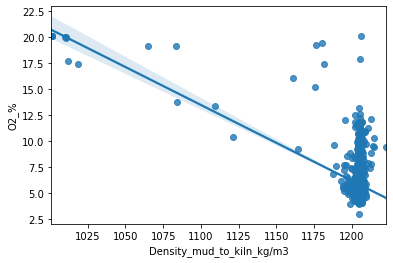

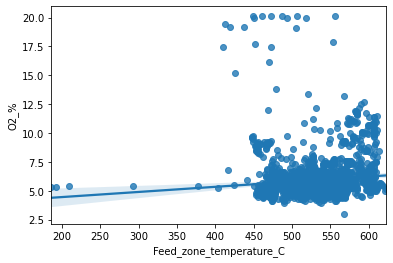

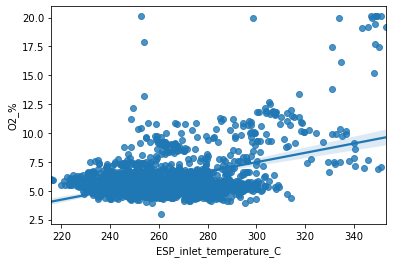

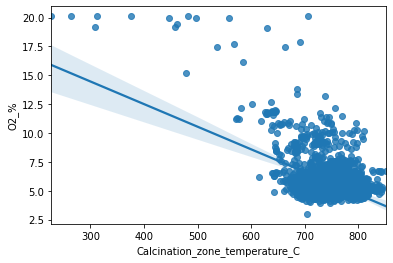

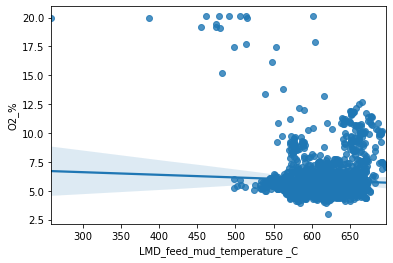

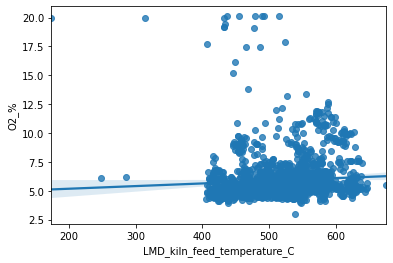

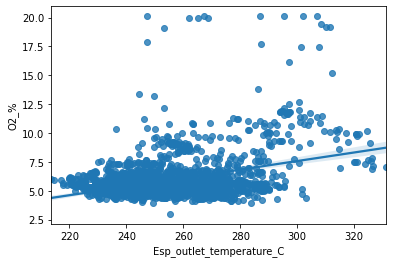

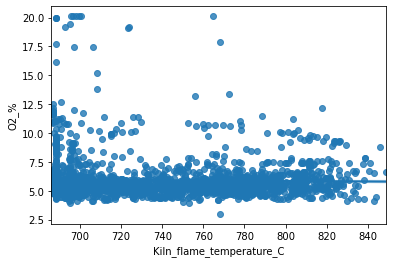

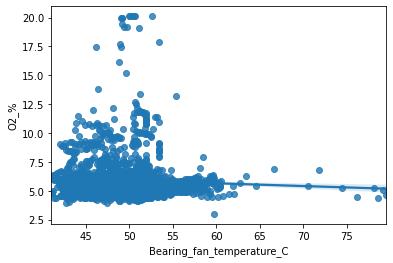

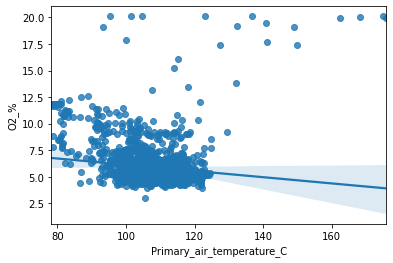

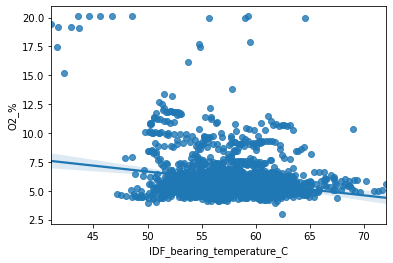

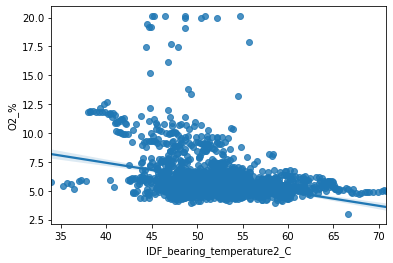

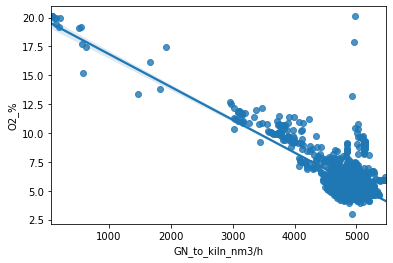

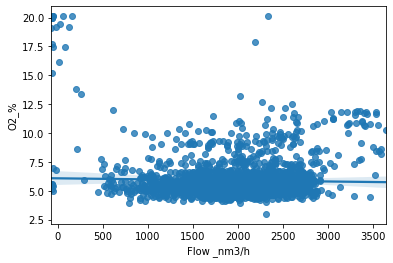

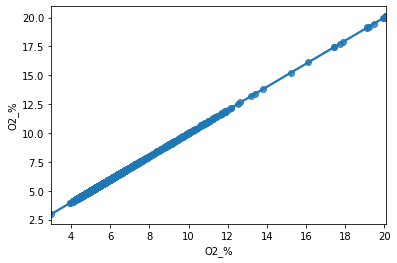

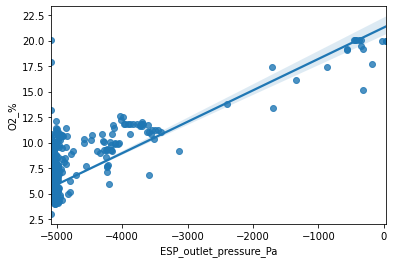

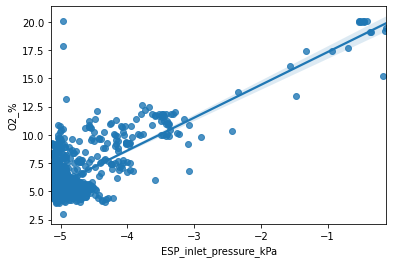

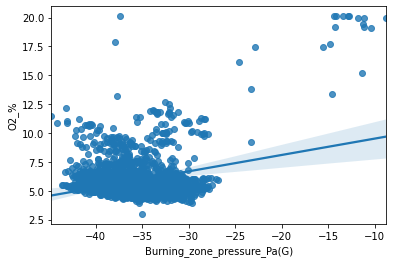

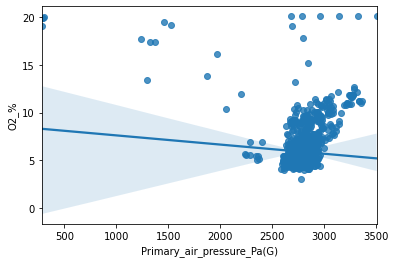

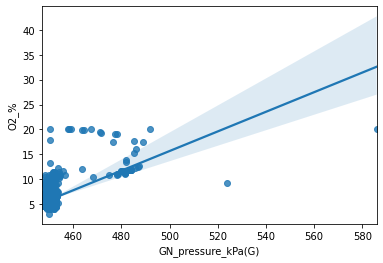

In [11]:
for i in df.columns:
    sns.regplot(x=i,y="O2_%",data=df)
    plt.show()

In [12]:
weak=df[["Feed_zone_temperature_C","LMD_feed_mud_temperature _C","LMD_kiln_feed_temperature_C","Kiln_flame_temperature_C","Bearing_fan_temperature_C","Primary_air_temperature_C","IDF_bearing_temperature_C","IDF_bearing_temperature2_C","Flow _nm3/h","Primary_air_pressure_Pa(G)","O2_%"]]
weak

,Feed_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Kiln_flame_temperature_C,Bearing_fan_temperature_C,Primary_air_temperature_C,IDF_bearing_temperature_C,IDF_bearing_temperature2_C,Flow _nm3/h,Primary_air_pressure_Pa(G),O2_%
0,502.068863,590.641734,415.707263,806.866767,41.612736,99.706232,48.849698,44.113005,2396.877217,2883.768439,6.481069
1,501.889027,590.520355,415.753664,809.187064,41.517202,99.564027,49.538594,43.924524,2306.910774,2868.067631,6.279912
2,502.103374,591.612307,414.413146,821.491469,41.421667,99.421822,50.227490,43.736043,2450.513819,2923.644826,6.196669
3,502.358130,592.601287,413.454411,830.704369,41.326133,99.279617,50.916387,43.547561,2611.431780,2908.512170,5.900719
4,502.612885,595.493488,411.233942,832.682633,41.230598,99.137412,51.605283,43.359080,2559.687420,2903.507123,4.999143
...,...,...,...,...,...,...,...,...,...,...,...
2476,518.194174,585.303597,412.658712,703.005751,53.634812,109.011692,57.391629,53.839421,1899.216390,2768.294611,5.899122
2477,515.589438,584.585492,414.981009,703.400545,53.539228,109.818245,57.592752,53.647787,1691.092324,2768.183025,6.028506
2478,514.448881,581.562052,409.265805,696.143494,53.443666,110.624798,57.476724,53.456154,1786.470344,2757.873411,6.100906
2479,513.322408,581.913239,409.632506,688.315620,53.348311,111.176716,57.284473,53.264521,1872.125848,2765.712822,6.002256


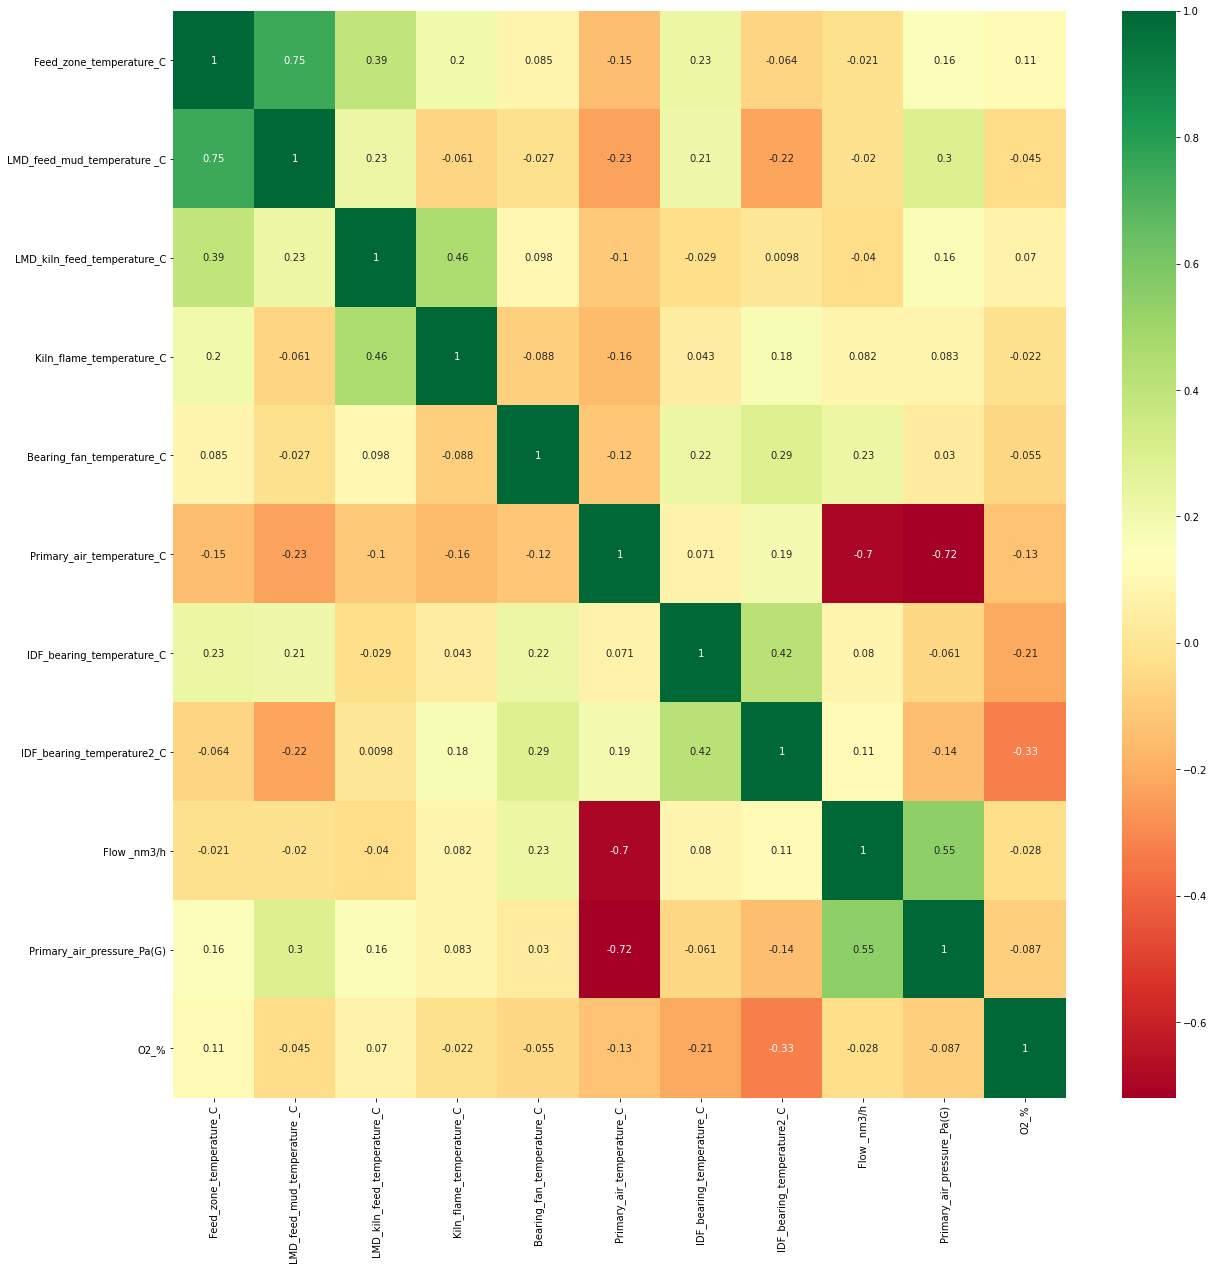

In [13]:
plt.figure(figsize=(20,20))
g=sns.heatmap(weak.corr(),annot=True,cmap="RdYlGn")

In [14]:
new_df=df.drop(["Feed_zone_temperature_C","LMD_feed_mud_temperature _C","LMD_kiln_feed_temperature_C","Kiln_flame_temperature_C","Bearing_fan_temperature_C","Primary_air_temperature_C","IDF_bearing_temperature_C","IDF_bearing_temperature2_C","Flow _nm3/h","Primary_air_pressure_Pa(G)"],axis=1)
new_df

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,ESP_inlet_temperature_C,Calcination_zone_temperature_C,Esp_outlet_temperature_C,GN_to_kiln_nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),GN_pressure_kPa(G)
0,798.667747,159.896639,1205.021608,269.685021,746.318993,263.412758,5042.171196,6.481069,-5029.683594,-4.927068,-34.905747,452.641449
1,798.449686,159.914889,1204.840400,266.796239,737.006654,260.127347,5025.550039,6.279912,-5029.683594,-4.939969,-35.112042,452.641449
2,798.231625,160.083309,1204.945270,267.337429,718.110868,260.303590,5008.928881,6.196669,-5029.683594,-4.952870,-35.883055,452.641449
3,798.013564,159.875902,1205.185474,267.587721,724.973224,260.904727,4993.424376,5.900719,-5029.683594,-4.965772,-34.664986,452.641449
4,797.795503,159.968484,1205.413424,271.760741,737.208821,263.358234,4989.879237,4.999143,-5029.683594,-4.974704,-33.810043,452.641449
...,...,...,...,...,...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,250.199807,800.164240,247.090915,5037.826172,5.899122,-5052.992188,-5.033316,-38.486442,447.823273
2477,802.488867,158.792972,1205.623589,249.908110,793.000562,246.396957,5037.826172,6.028506,-5052.992188,-5.034819,-39.281534,447.823273
2478,799.798393,158.471010,1205.102027,250.391824,767.159511,245.702999,5037.826172,6.100906,-5052.992188,-5.036322,-38.877864,447.823273
2479,797.107920,158.044266,1205.179526,249.169585,755.507199,245.009041,5037.826172,6.002256,-5052.992188,-5.037825,-40.392731,447.823273


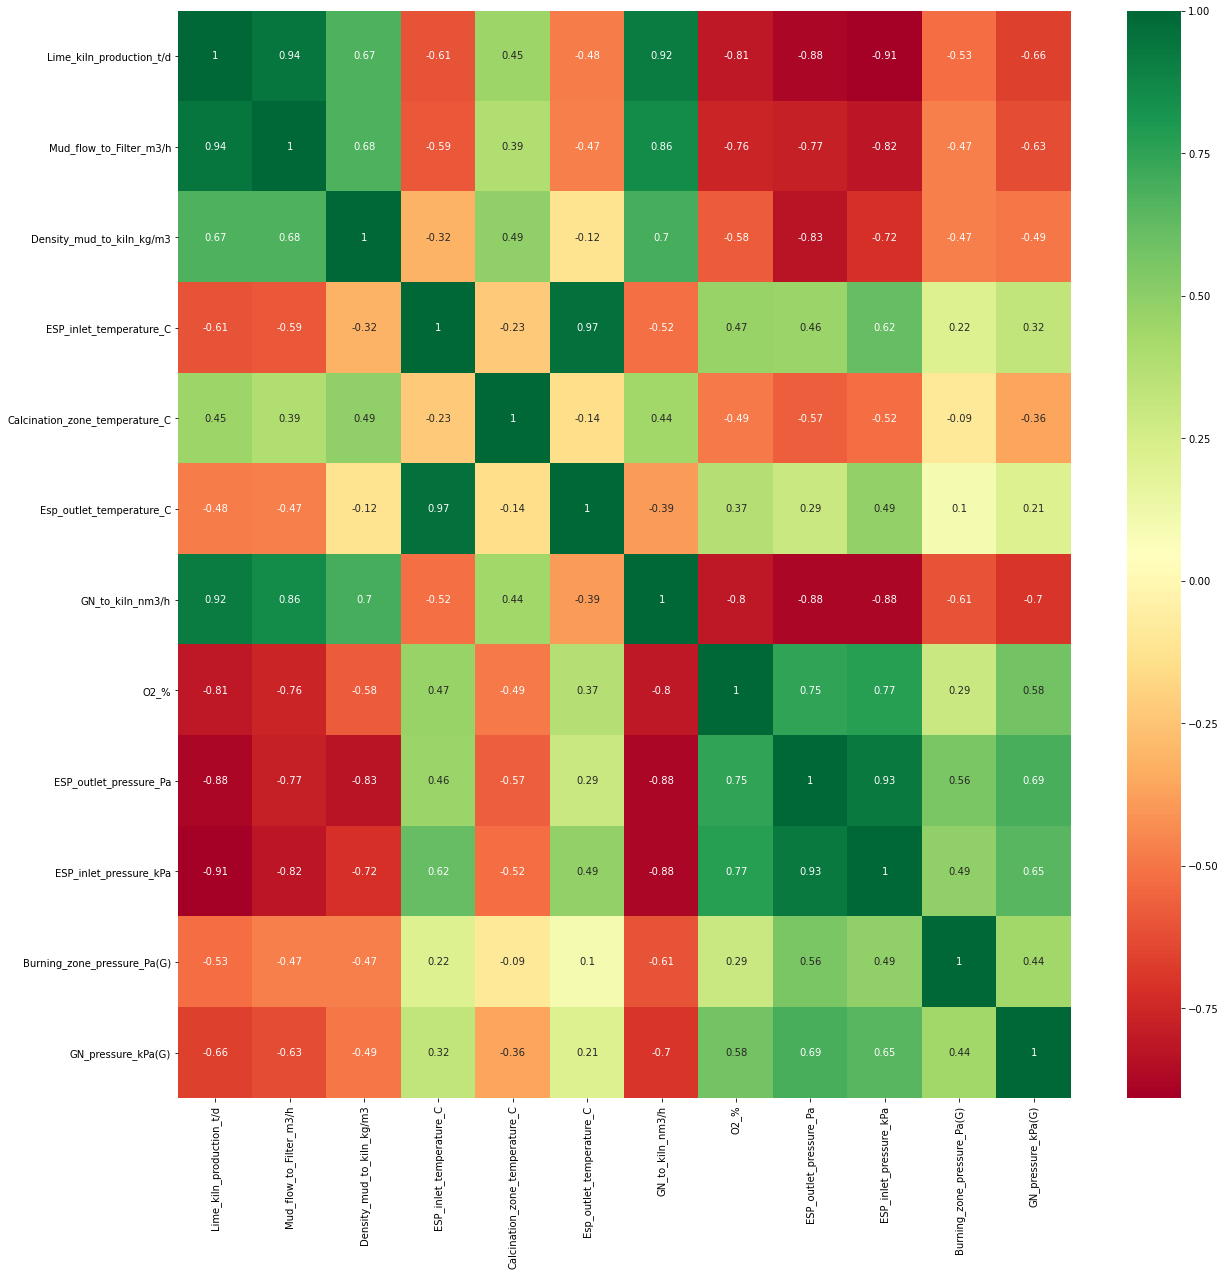

In [15]:
plt.figure(figsize=(20,20))
g=sns.heatmap(new_df.corr(),annot=True,cmap="RdYlGn")

In [16]:
x_=new_df.drop("O2_%",axis=1)
y=new_df[["O2_%"]]

In [17]:
x_

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,ESP_inlet_temperature_C,Calcination_zone_temperature_C,Esp_outlet_temperature_C,GN_to_kiln_nm3/h,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),GN_pressure_kPa(G)
0,798.667747,159.896639,1205.021608,269.685021,746.318993,263.412758,5042.171196,-5029.683594,-4.927068,-34.905747,452.641449
1,798.449686,159.914889,1204.840400,266.796239,737.006654,260.127347,5025.550039,-5029.683594,-4.939969,-35.112042,452.641449
2,798.231625,160.083309,1204.945270,267.337429,718.110868,260.303590,5008.928881,-5029.683594,-4.952870,-35.883055,452.641449
3,798.013564,159.875902,1205.185474,267.587721,724.973224,260.904727,4993.424376,-5029.683594,-4.965772,-34.664986,452.641449
4,797.795503,159.968484,1205.413424,271.760741,737.208821,263.358234,4989.879237,-5029.683594,-4.974704,-33.810043,452.641449
...,...,...,...,...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,250.199807,800.164240,247.090915,5037.826172,-5052.992188,-5.033316,-38.486442,447.823273
2477,802.488867,158.792972,1205.623589,249.908110,793.000562,246.396957,5037.826172,-5052.992188,-5.034819,-39.281534,447.823273
2478,799.798393,158.471010,1205.102027,250.391824,767.159511,245.702999,5037.826172,-5052.992188,-5.036322,-38.877864,447.823273
2479,797.107920,158.044266,1205.179526,249.169585,755.507199,245.009041,5037.826172,-5052.992188,-5.037825,-40.392731,447.823273


In [18]:
x =  StandardScaler().fit_transform(x_)

In [19]:
x

array([[ 0.41114171,  0.43783184,  0.08021381, ...,  0.00826881,
         0.1729889 ,  0.41484928],
       [ 0.40857793,  0.4389976 ,  0.06702805, ..., -0.01960967,
         0.1155337 ,  0.41484928],
       [ 0.40601414,  0.44975596,  0.07465901, ..., -0.04748816,
        -0.0992013 ,  0.41484928],
       ...,
       [ 0.42443494,  0.34676532,  0.08606557, ..., -0.22781878,
        -0.93328652, -0.52793368],
       [ 0.39280251,  0.31950572,  0.09170485, ..., -0.23106631,
        -1.35519254, -0.52793368],
       [ 0.36117008,  0.31847741,  0.09370067, ..., -0.23431384,
        -1.11603037, -0.52793368]])

In [20]:
y=np.ravel(y)
y

array([6.48106859, 6.27991207, 6.19666914, ..., 6.10090626, 6.00225567,
       5.835135  ])

In [22]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_,y,test_size = 0.3,random_state=1)

In [23]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
predict=rf.predict(X_valid)

In [25]:
mse = mean_squared_error(Y_valid, predict)
print(mse)

0.30809291568841607


In [35]:
mae= mean_absolute_error(Y_valid,predict)
print(mae)

0.3272794557162255


In [36]:
rmse=math.sqrt(mse)
print(rmse)

0.5550611819326011


In [26]:
print(r2_score(Y_valid, predict))

0.8813587528950008


In [27]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [28]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
rf1=RandomForestRegressor()

In [30]:
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [31]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [37]:
best_random = rf_random.best_estimator_

In [38]:
predict1=best_random.predict(X_valid)

In [39]:
mse = mean_squared_error(Y_valid, predict1)
print(mse)

0.2606833679782932


In [41]:
mae= mean_absolute_error(Y_valid,predict1)
print(mae)

0.295259079771964


In [40]:
rmse=math.sqrt(mse)
print(rmse)

0.5105716090601721


In [53]:
print(r2_score(Y_valid, predict1))

0.9025847727165944


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf2 = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [43]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.2min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [44]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [45]:
best_grid = grid_search.best_estimator_

In [46]:
predict3=best_grid.predict(X_valid)

In [47]:
rmse=math.sqrt(mse)
print(rmse)

0.5105716090601721


In [48]:
mse = mean_squared_error(Y_valid, predict3)
print(mse)

0.33974970961644085


In [49]:
mae= mean_absolute_error(Y_valid, predict3)
print(mae)

0.35419214762674567


In [50]:
print(r2_score(Y_valid, predict3))

0.8691682697007517


In [ ]:
The highest R^2 Score achieved was 90.25% by tuning the model using randomized search CV
MSE= 0.26
MAE= 0.29
RMSE= 0.51